In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import plotly.plotly as py
import plotly.graph_objs as go

import requests

from utils import utils_v2
plt.rcParams['figure.figsize'] = (15, 7) 
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
threshold_array = np.logspace(np.log10(0.0001),np.log10(0.0505),250)
threshold_array_pct = np.logspace(np.log10(0.01),np.log10(5.05),250)

In [33]:
data = pd.read_csv('EURUSD_15m_BID_01.01.2010-31.12.2016.csv')

In [34]:
data['Timestamp'] = pd.to_datetime(data['Time'])
data.drop('Time',axis=1,inplace = True)
data = data.set_index('Timestamp');

In [35]:
#date = ''2010 Jan 1':'2016 Dec 31''    
stock_series = data.loc['2010 Jan 1':'2016 Dec 31']['Close']

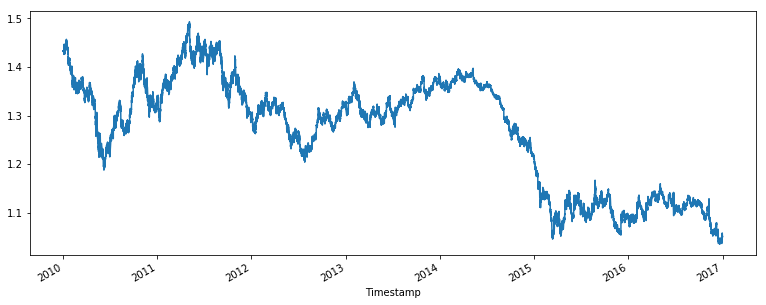

In [36]:
stock_series.plot(figsize=(13,5));

In [37]:
threshold_array = np.logspace(np.log10(0.0001),np.log10(0.0505),250)
threshold_array_pct = np.logspace(np.log10(0.01),np.log10(5.05),250)

In [38]:
N_DC_array = []

for value in threshold_array:
    DCA, CPA = utils_v2.get_events(stock_series,threshold = value)
    N_DC_array.append(len(DCA))

In [39]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(threshold_array_pct.reshape(250,1),np.array(N_DC_array).reshape(250,1))

predictions = lm.predict(threshold_array_pct.reshape(250,1))

lm.score(predictions,np.array(N_DC_array).reshape(250,1))

-92655175.00352138

In [40]:
model.coef_

array([[-10089.29377232]])

In [41]:
model.intercept_

array([27024.49103586])

In [30]:
trace1 = go.Scatter(
    x=threshold_array_pct,
    y=N_DC_array,
    mode='markers',
    line=dict(
        color='rgb(250,0,0)'
    )
)

trace2 = go.Scatter(
    x=threshold_array_pct,
    y=(threshold_array_pct.reshape(250,1)/5.430)**(-2.178),
    mode='markers',
    line=dict(
        color='rgb(0,250,0)'
    )
)

trace3 = go.Scatter(
    x=threshold_array_pct,
    y=np.exp(-2.178*np.log(threshold_array_pct)+2.178*np.log(5.430)),
    mode='markers',
    line=dict(
        color='rgb(0,0,250)'
    )
)

dt = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='log',
        autorange=True
    )
)
fig = go.Figure(data=dt, layout=layout)
py.iplot(fig, filename='text')

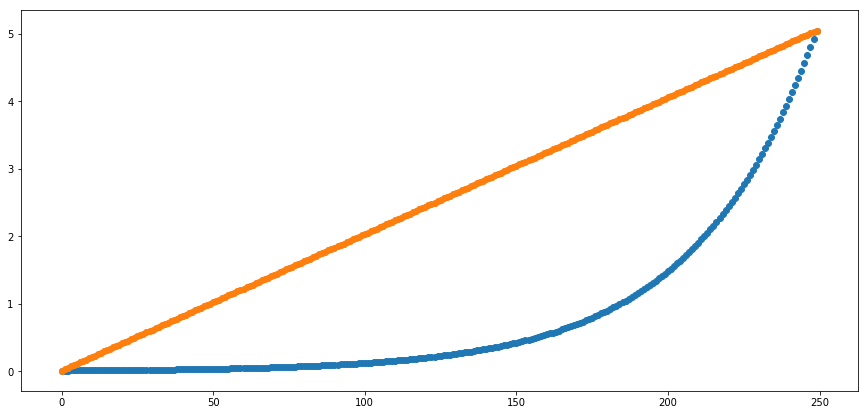

In [48]:
plt.rcParams['figure.figsize'] = (15, 7) 
plt.scatter(np.arange(0,250),threshold_array_pct); 
plt.scatter(np.arange(0,250),np.linspace(0.01,5.05,250));

In [49]:
np.log10(0.01)

-2.0

In [50]:
np.log10(5.05)

0.7032913781186614

In [54]:
np.linspace(0.01,5.05,250)

array([0.01      , 0.03024096, 0.05048193, 0.07072289, 0.09096386,
       0.11120482, 0.13144578, 0.15168675, 0.17192771, 0.19216867,
       0.21240964, 0.2326506 , 0.25289157, 0.27313253, 0.29337349,
       0.31361446, 0.33385542, 0.35409639, 0.37433735, 0.39457831,
       0.41481928, 0.43506024, 0.4553012 , 0.47554217, 0.49578313,
       0.5160241 , 0.53626506, 0.55650602, 0.57674699, 0.59698795,
       0.61722892, 0.63746988, 0.65771084, 0.67795181, 0.69819277,
       0.71843373, 0.7386747 , 0.75891566, 0.77915663, 0.79939759,
       0.81963855, 0.83987952, 0.86012048, 0.88036145, 0.90060241,
       0.92084337, 0.94108434, 0.9613253 , 0.98156627, 1.00180723,
       1.02204819, 1.04228916, 1.06253012, 1.08277108, 1.10301205,
       1.12325301, 1.14349398, 1.16373494, 1.1839759 , 1.20421687,
       1.22445783, 1.2446988 , 1.26493976, 1.28518072, 1.30542169,
       1.32566265, 1.34590361, 1.36614458, 1.38638554, 1.40662651,
       1.42686747, 1.44710843, 1.4673494 , 1.48759036, 1.50783

In [53]:
np.logspace(np.log10(0.01),np.log10(5.05),250)

array([0.01      , 0.01025313, 0.01051267, 0.01077878, 0.01105163,
       0.01133138, 0.01161822, 0.01191231, 0.01221385, 0.01252303,
       0.01284003, 0.01316505, 0.0134983 , 0.01383999, 0.01419032,
       0.01454953, 0.01491782, 0.01529544, 0.01568262, 0.0160796 ,
       0.01648663, 0.01690396, 0.01733185, 0.01777058, 0.01822041,
       0.01868163, 0.01915453, 0.01963939, 0.02013653, 0.02064625,
       0.02116887, 0.02170473, 0.02225415, 0.02281747, 0.02339506,
       0.02398726, 0.02459446, 0.02521703, 0.02585535, 0.02650984,
       0.02718089, 0.02786893, 0.02857438, 0.02929769, 0.03003932,
       0.03079971, 0.03157935, 0.03237873, 0.03319834, 0.0340387 ,
       0.03490033, 0.03578378, 0.03668958, 0.03761832, 0.03857056,
       0.03954691, 0.04054797, 0.04157438, 0.04262676, 0.04370578,
       0.04481212, 0.04594647, 0.04710952, 0.04830202, 0.0495247 ,
       0.05077834, 0.0520637 , 0.05338161, 0.05473287, 0.05611834,
       0.05753888, 0.05899538, 0.06048875, 0.06201992, 0.06358

In [55]:
a= np.geomspace(0.01,5.05,250)

In [60]:
np.log10(a[-2])-np.log10(a[-3])

0.01085659187999477

In [57]:
a[1]-a[0]

0.0002531330225639932

In [58]:
a[2]-a[1]

0.0002595406552752359